In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import yaml
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
import sacc
import pacc
import random
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rc('legend',fontsize=18)

## Load Data

In [2]:
s_wlwl = sacc.Sacc.load_fits("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc")
y_wlwl = yaml.load(open("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/wlwl.yml"), Loader=yaml.FullLoader)

s_gcgc = sacc.Sacc.load_fits("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc")
y_gcgc = yaml.load(open("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/gcgc.yml"), Loader=yaml.FullLoader)

s_3x2 = sacc.Sacc.load_fits("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc")
y_3x2 = yaml.load(open("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/gcgc_gcwl_wlwl.yml"), Loader=yaml.FullLoader)

In [3]:
cle_3x2  = pacc.ClsEnsemble(s_3x2, y_3x2,   label="CosmoDC2 3x2  - data")
cle_wlwl = pacc.ClsEnsemble(s_wlwl, y_wlwl, label="CosmoDC2 wlwl - data")
cle_gcgc = pacc.ClsEnsemble(s_gcgc, y_gcgc, label="CosmoDC2 gcgc - data")

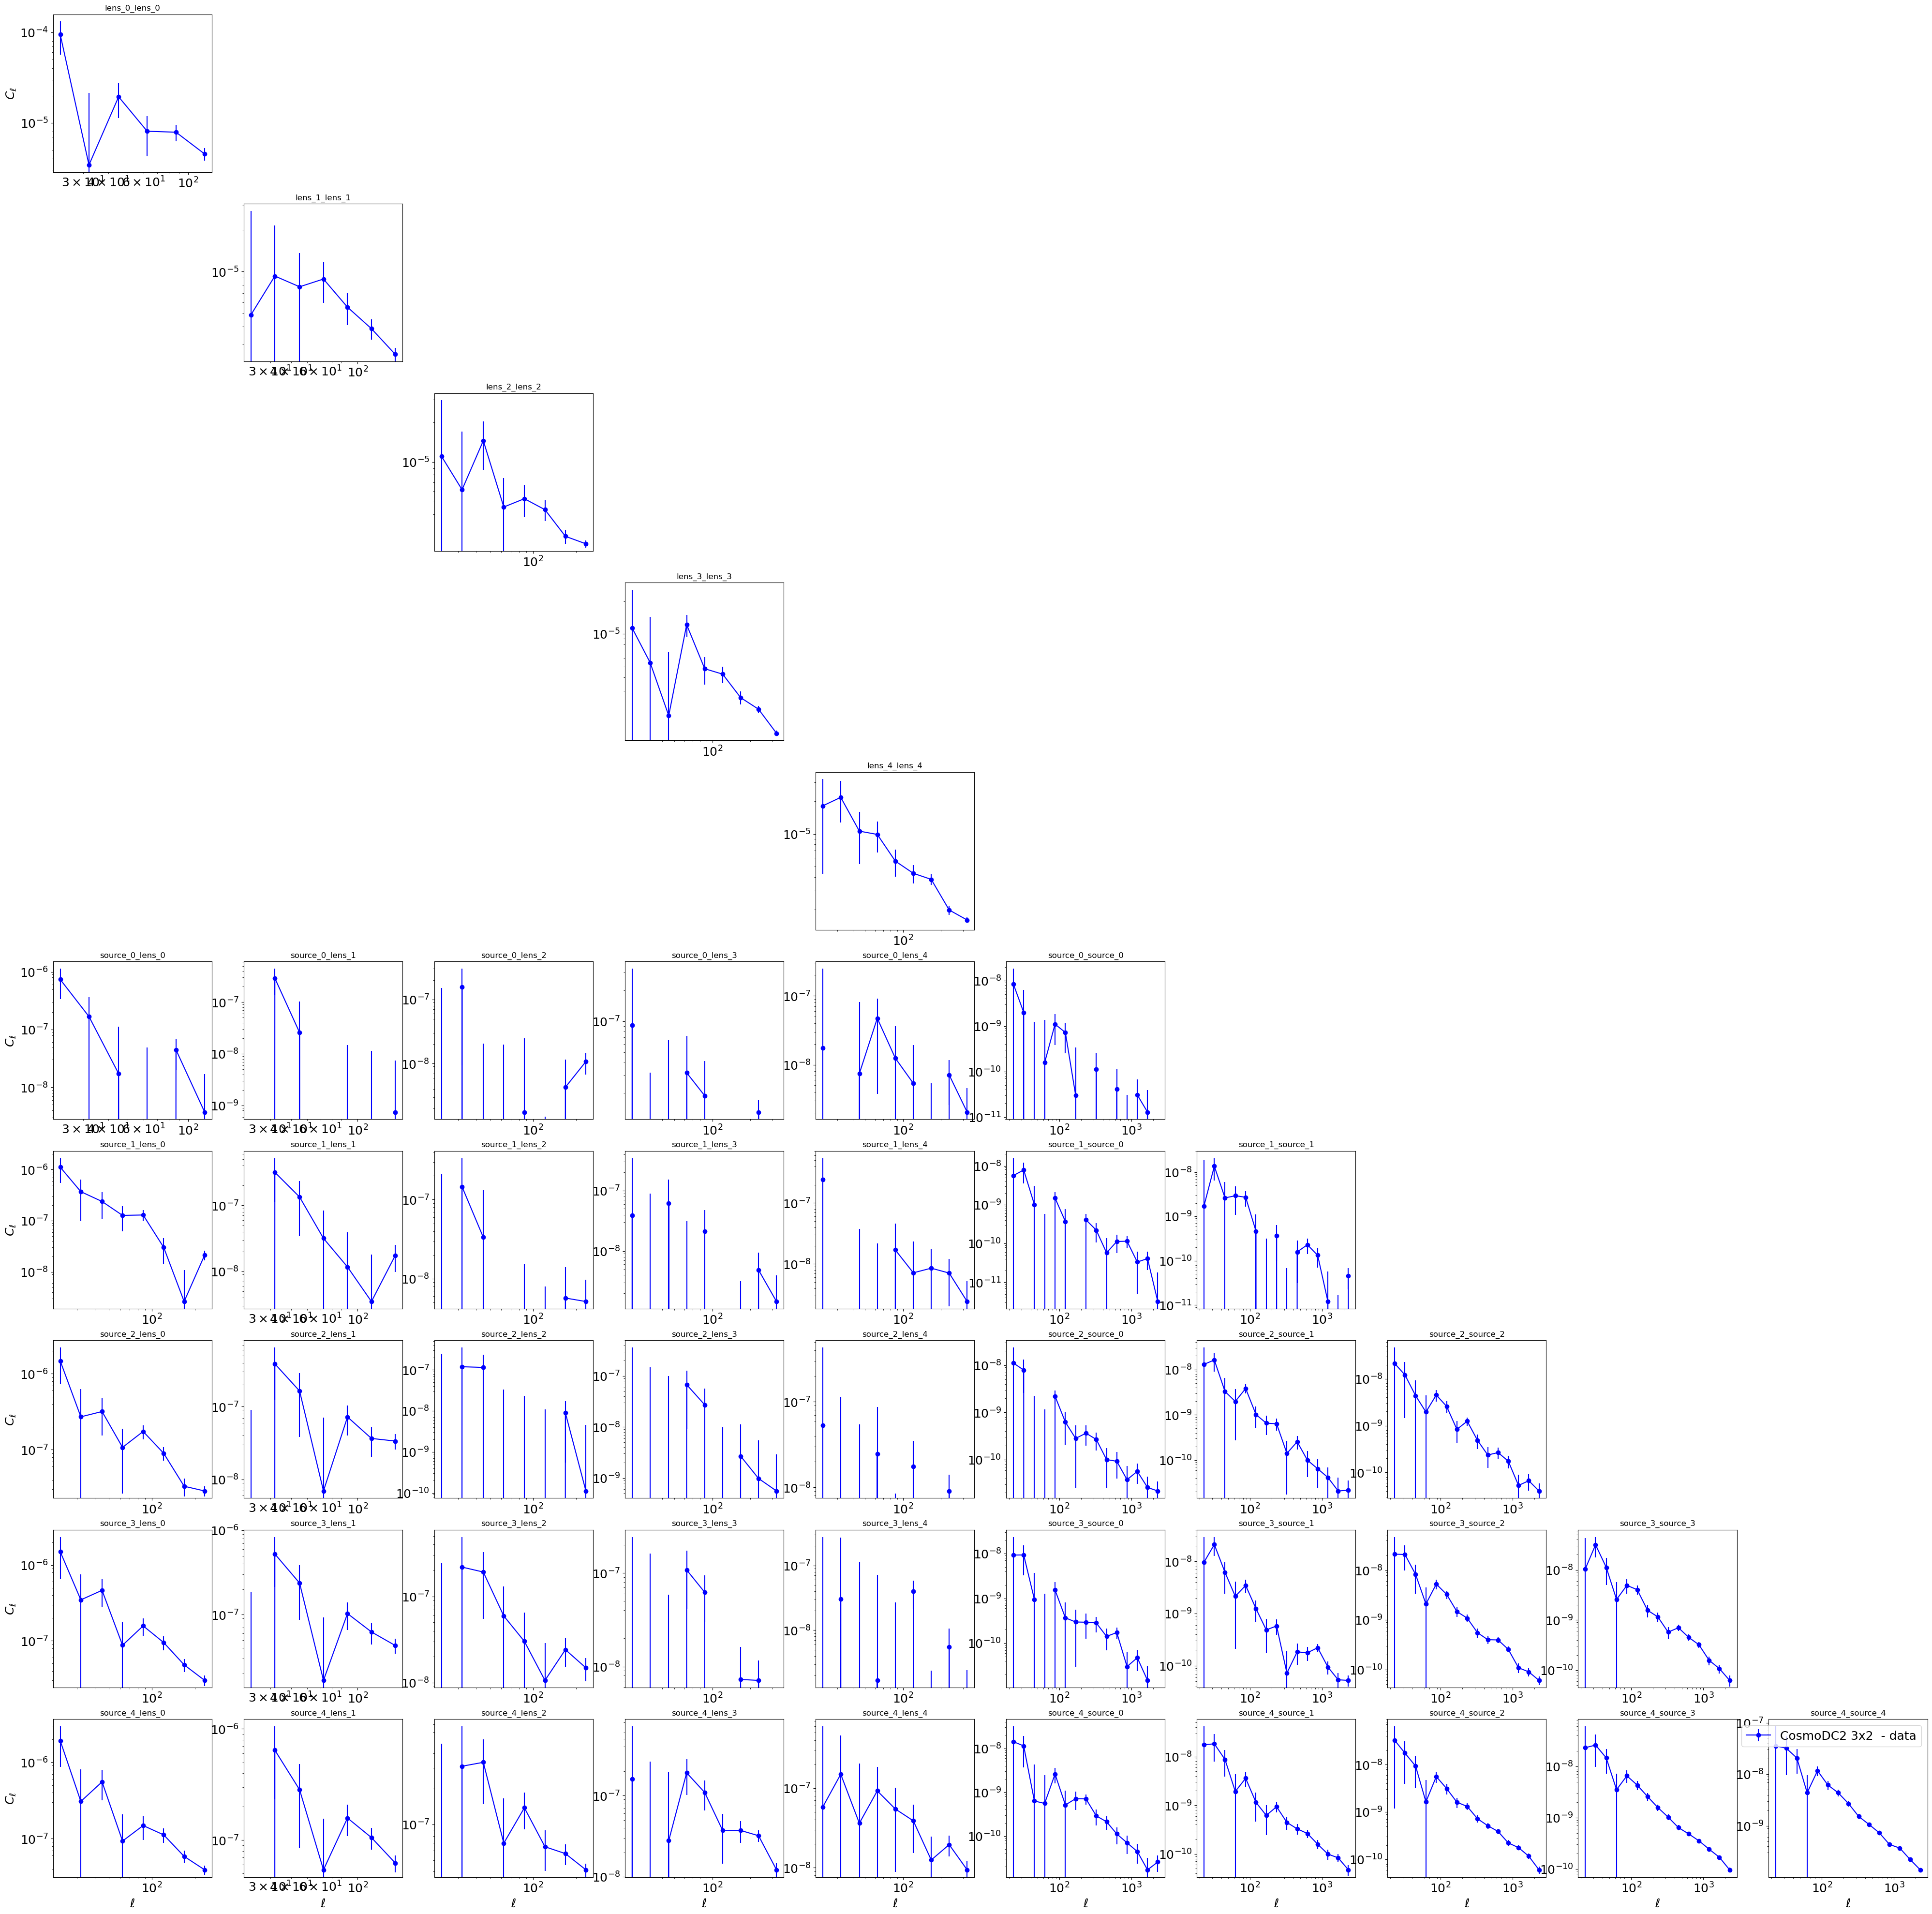

In [4]:
pacc.plot_cls([[cle_3x2]], cle_3x2.pairs)

## Load Chains

In [5]:
def add_chains(paths, start=1, stop=100):
    chains = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"chain_{}.csv".format(i))) & (i<=stop):
            chain = pd.read_csv(path+"chain_{}.csv".format(i))
            chains.append(chain)
            i += 1
    return pd.concat(chains)

In [6]:
path_3x2_nomarg = "fake_chains/nomarg/CosmoDC2_3x2_bp_nomarg_TAP_0.65_init_ϵ_0.03/"
path_gcgc_nomarg = "fake_chains/nomarg/CosmoDC2_gcgc_bp_nomarg_TAP_0.95_init_ϵ_0.01/"
path_wlwl_nomarg = "chains_right_nzs/nomarg/CosmoDC2_wlwl_nomarg_TAP_0.65/"

path_3x2_dz_ana = "fake_chains/analytical/CosmoDC2_3x2_bp_ana_TAP_0.65_init_ϵ_0.03/"
path_gcgc_dz_ana = "fake_chains/analytical/CosmoDC2_gcgc_bp_ana_TAP_0.65_init_ϵ_0.01/"
path_wlwl_dz_ana = "chains_right_nzs/analytical/CosmoDC2_wlwl_ana_TAP_0.65/"

path_gcgc_dz_num = "fake_chains/numerical/CosmoDC2_gcgc_dz_num_TAP_0.65_init_ϵ_0.01/"
path_wlwl_dz_num = "chains_right_nzs/numerical/CosmoDC2_wlwl_dz_num_TAP_0.65/"

In [7]:
chain_3x2_nomarg = add_chains([path_3x2_nomarg])
chain_gcgc_nomarg = add_chains([path_gcgc_nomarg])
chain_wlwl_nomarg = add_chains([path_wlwl_nomarg])

chain_3x2_dz_ana = add_chains([path_3x2_dz_ana])
chain_gcgc_dz_ana = add_chains([path_gcgc_dz_ana])
chain_wlwl_dz_ana = add_chains([path_wlwl_dz_ana])

chain_gcgc_dz_num = add_chains([path_gcgc_dz_num])
chain_wlwl_dz_num = add_chains([path_wlwl_dz_num])

## Trace plots

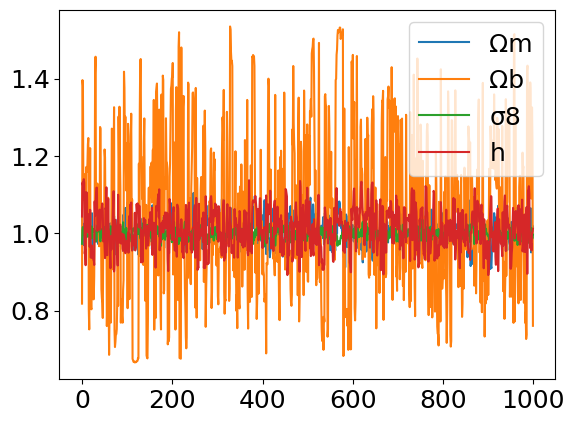

In [8]:
plt.plot(np.array(chain_3x2_nomarg["Ωm"])/0.2734714358876248, label="Ωm")
plt.plot(np.array(chain_3x2_nomarg["Ωb"])/0.042170616570847225, label="Ωb")
plt.plot(np.array(chain_3x2_nomarg["σ8"])/0.7790071910238021, label="σ8")
plt.plot(np.array(chain_3x2_nomarg["h"])/0.7189925511925751, label="h")
plt.legend()

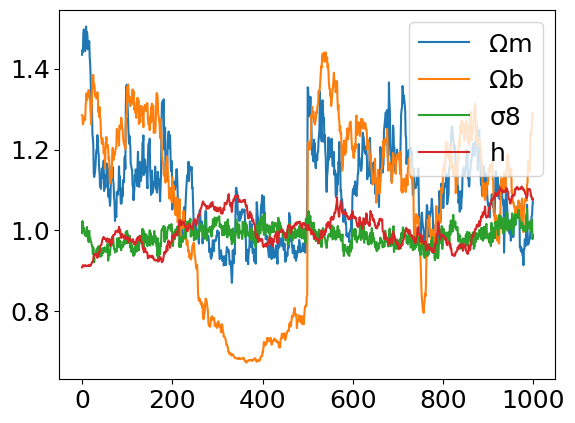

In [9]:
plt.plot(np.array(chain_gcgc_nomarg["Ωm"])/0.2734714358876248, label="Ωm")
plt.plot(np.array(chain_gcgc_nomarg["Ωb"])/0.042170616570847225, label="Ωb")
plt.plot(np.array(chain_gcgc_nomarg["σ8"])/0.7790071910238021, label="σ8")
plt.plot(np.array(chain_gcgc_nomarg["h"])/0.7189925511925751, label="h")
#plt.plot(np.array(chain_gcgc_nomarg["ns"])/np.mean(np.array(chain_gcgc_nomarg["ns"])), label="ns")
plt.legend()

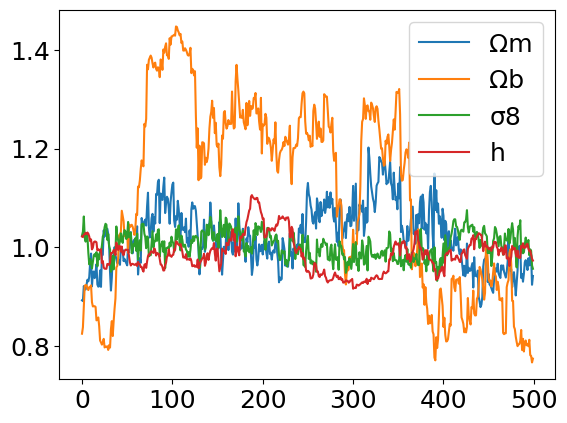

In [10]:
plt.plot(np.array(chain_gcgc_dz_num["Ωm"])/0.2734714358876248, label="Ωm")
plt.plot(np.array(chain_gcgc_dz_num["Ωb"])/0.042170616570847225, label="Ωb")
plt.plot(np.array(chain_gcgc_dz_num["σ8"])/0.7790071910238021, label="σ8")
plt.plot(np.array(chain_gcgc_dz_num["h"])/0.7189925511925751, label="h")
plt.legend()

## Posteriors

In [11]:
labels_dict = {'h': 'h',
               'Ωm': '\Omega_m',
               'Ωb': '\Omega_b',
               'ns': 'n_s',
               'σ8': '\sigma_8',
               'S8': 'S_8',
               'A_IA': 'A_{IA}',
               'alpha_IA': r'\alpha_{IA}',
               
               'DESgc__0_dz': 'dz_{DESY1gc 0}',
               'DESgc__1_dz': 'dz_{DESY1gc 1}',
               'DESgc__2_dz': 'dz_{DESY1gc 2}',
               'DESgc__3_dz': 'dz_{DESY1gc 3}',
               'DESgc__4_dz': 'dz_{DESY1gc 4}',
               
               'DESwl__0_dz': 'dz_{DESY1wl 0}',
               'DESwl__1_dz': 'dz_{DESY1wl 1}',
               'DESwl__2_dz': 'dz_{DESY1wl 2}',
               'DESwl__3_dz': 'dz_{DESY1wl 3}',
               
               'DESgc__0_b': 'b_{DESY1 0}',
               'DESgc__1_b': 'b_{DESY1 1}',
               'DESgc__2_b': 'b_{DESY1 2}',
               'DESgc__3_b': 'b_{DESY1 3}',
               'DESgc__4_b': 'b_{DESY1 4}',
               
               'DESwl__0_m': 'm_{DESY1 0}',
               'DESwl__1_m': 'm_{DESY1 1}',
               'DESwl__2_m': 'm_{DESY1 2}', 
               'DESwl__3_m': 'm_{DESY1 3}',
               
               'DESwl__0_b': 'b_{DESY1 0}',
               'DESwl__1_b': 'b_{DESY1 1}',
               'DESwl__2_b': 'b_{DESY1 2}', 
               'DESwl__3_b': 'b_{DESY1 3}'}

<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:3: SyntaxWarning: invalid escape sequence '\O'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:3: SyntaxWarning: invalid escape sequence '\O'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_80220/2809256174.py:2: SyntaxWarning: invalid escape sequence '\O'
  'Ωm': '\Omega_m',
/tmp/ipykernel_80220/2809256174.py:3: SyntaxWarning: invalid escape sequence '\O'
  'Ωb': '\Omega_b',
/tmp/ipykernel_80220/2809256174.py:5: SyntaxWarning: invalid escape sequence '\s'
  'σ8': '\sigma_8',


In [12]:
def make_chain(file, label, ranges=dict({}), weight=False, labels_dict=labels_dict):
    params = np.array(list(file.keys()))
    names = []
    labels = []
    samples = []
    print(label)
    for param in params:
        #print(param)
        if param in labels_dict.keys():
            #print(param)
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])
    if ('σ8' in params) & ('Ωm' in params):
        #print('S8')
        names.append('S8')
        labels.append(labels_dict['S8'])
        samples.append(file['σ8']*np.sqrt(file['Ωm']/0.3))

    names = np.array(names)
    labels = np.array(labels)
    samples = np.transpose(np.array(samples))
    if weight == True:
        if "log_density" in params:
            print("applying weights")
            ws = np.array(file['log_density'])
    else:
        ws = None
    print("========")

    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges, weights=ws,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})
    

In [13]:
samples_wlwl_dz_ana = make_chain(chain_wlwl_dz_ana, r"CosmoDC2 WLWL - $\Delta_z + w_z$ Analytical")
samples_gcgc_dz_ana = make_chain(chain_gcgc_dz_ana, r"CosmoDC2 GCGC - $\Delta_z + w_z$ Analytical")
samples_3x2_dz_ana = make_chain(chain_3x2_dz_ana, r"CosmoDC2 3x2 - $\Delta_z + w_z$ Analytical")

CosmoDC2 WLWL - $\Delta_z + w_z$ Analytical
Removed no burn in
CosmoDC2 GCGC - $\Delta_z + w_z$ Analytical
Removed no burn in
CosmoDC2 3x2 - $\Delta_z + w_z$ Analytical
Removed no burn in


In [14]:
samples_wlwl_dz_num = make_chain(chain_wlwl_dz_num, r"CosmoDC2 WLWL - $\Delta_z + w_z$ Numerical")
samples_gcgc_dz_num = make_chain(chain_gcgc_dz_num, r"CosmoDC2 GCGC - $\Delta_z + w_z$ Numerical")

CosmoDC2 WLWL - $\Delta_z + w_z$ Numerical
Removed no burn in
CosmoDC2 GCGC - $\Delta_z + w_z$ Numerical
Removed no burn in


In [15]:
samples_wlwl_nomarg = make_chain(chain_wlwl_nomarg, "CosmoDC2 WLWL - Fixed")
samples_gcgc_nomarg = make_chain(chain_gcgc_nomarg, "CosmoDC2 GCGC - Fixed")
#samples_gcgc_nomarg2 = make_chain(chain_gcgc_nomarg2, "CosmoDC2 GCGC - Fixed 2")
samples_3x2_nomarg  = make_chain(chain_3x2_nomarg,  "CosmoDC2 3x2 - Fixed")
#samples_3x2_nomarg2 = make_chain(chain_3x2_nomarg2, "CosmoDC2 3x2 - Fixed 2")
#samples_3x2_nomarg3 = make_chain(chain_3x2_nomarg3, "CosmoDC2 3x2 - Fixed 3")

CosmoDC2 WLWL - Fixed
Removed no burn in
CosmoDC2 GCGC - Fixed
Removed no burn in
CosmoDC2 3x2 - Fixed
Removed no burn in


In [16]:
prat_markers = {'h': 0.7189925511925751,
               'Ωm': 0.2734714358876248,
               'Ωb': 0.042170616570847225,
               'ns': 0.9965136823002241,
               'σ8': 0.7790071910238021}
prat_markers['S8'] = prat_markers['σ8']*np.sqrt(prat_markers['Ωm']/0.3)

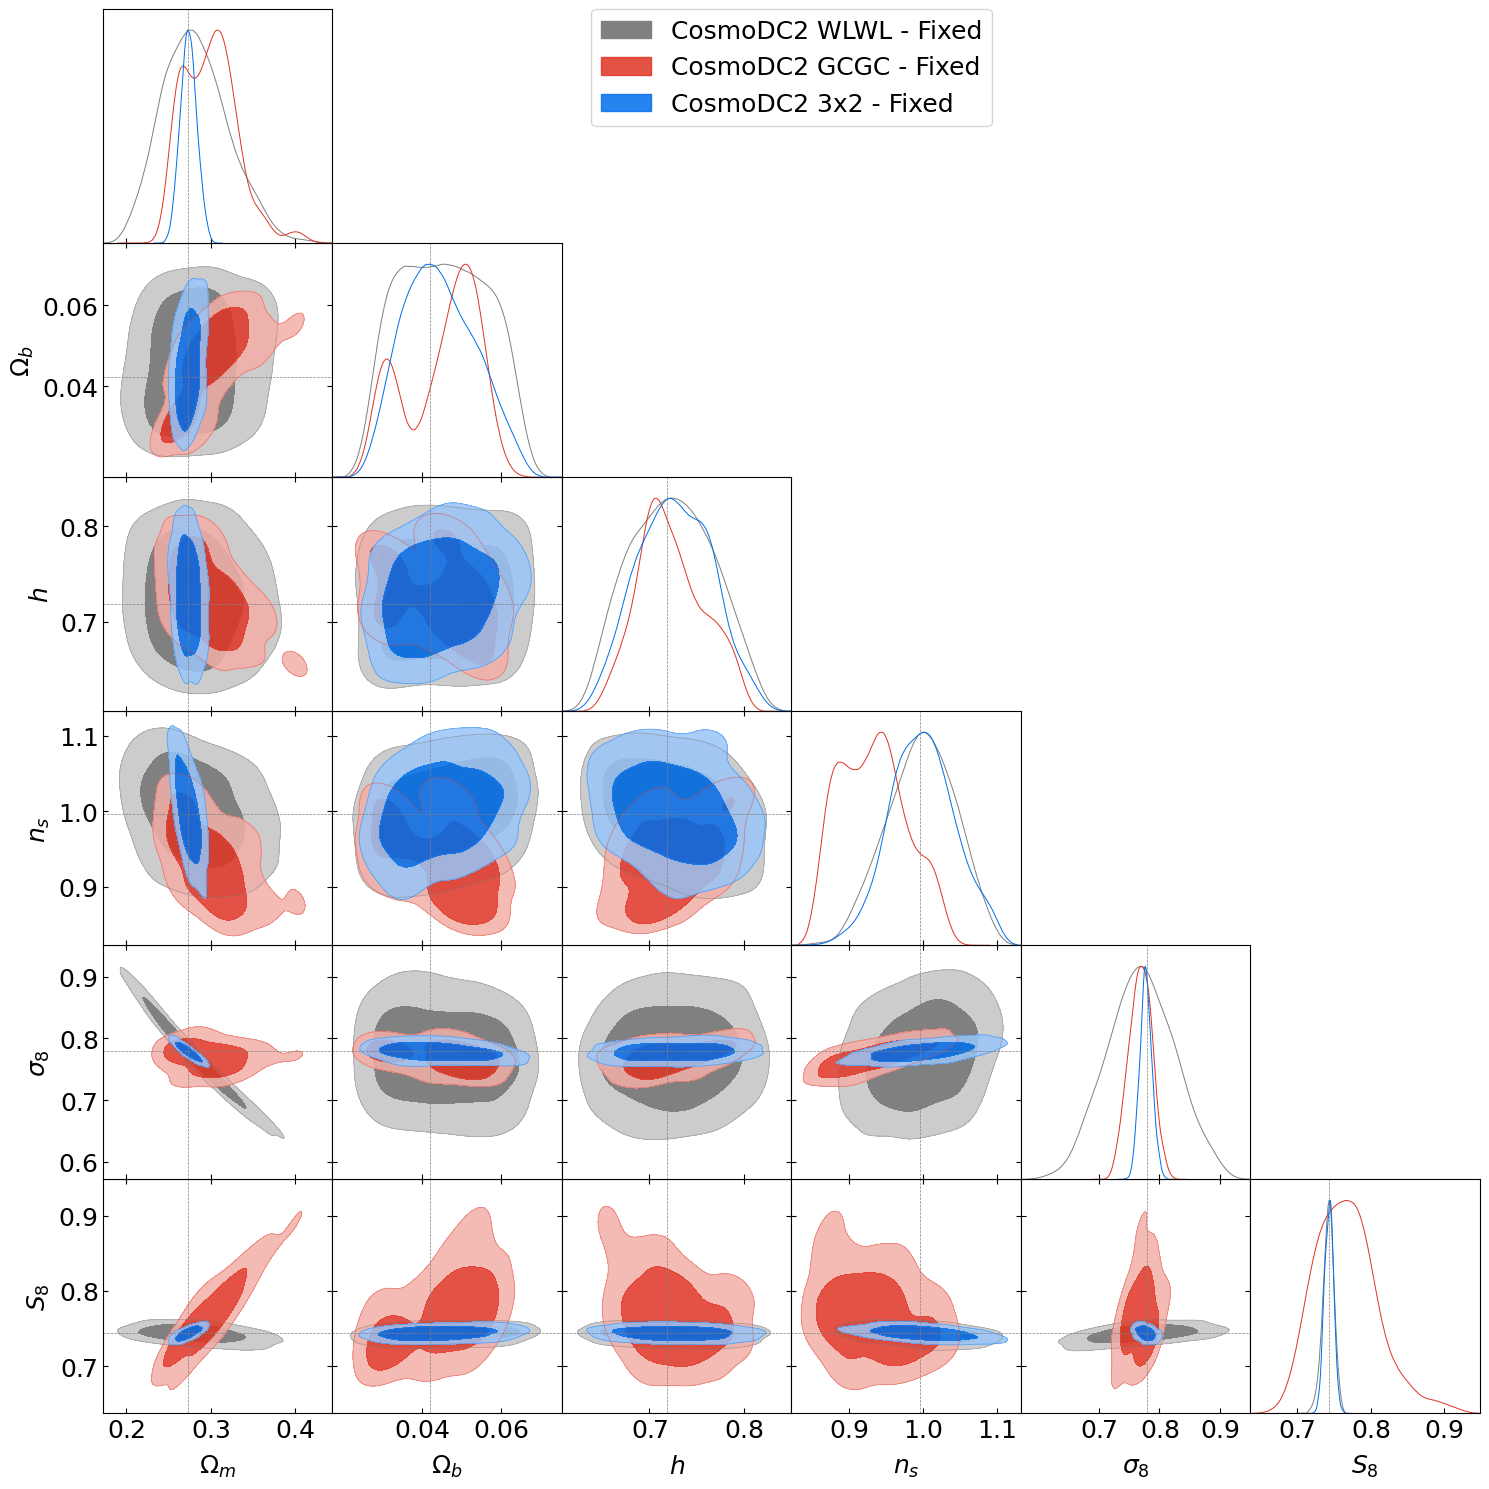

In [17]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([samples_wlwl_nomarg,
                 samples_gcgc_nomarg,
                 samples_3x2_nomarg],
                 ['Ωm', 'Ωb', 'h', 'ns', 'σ8', 'S8'],
                 markers=prat_markers,
                 filled=True)

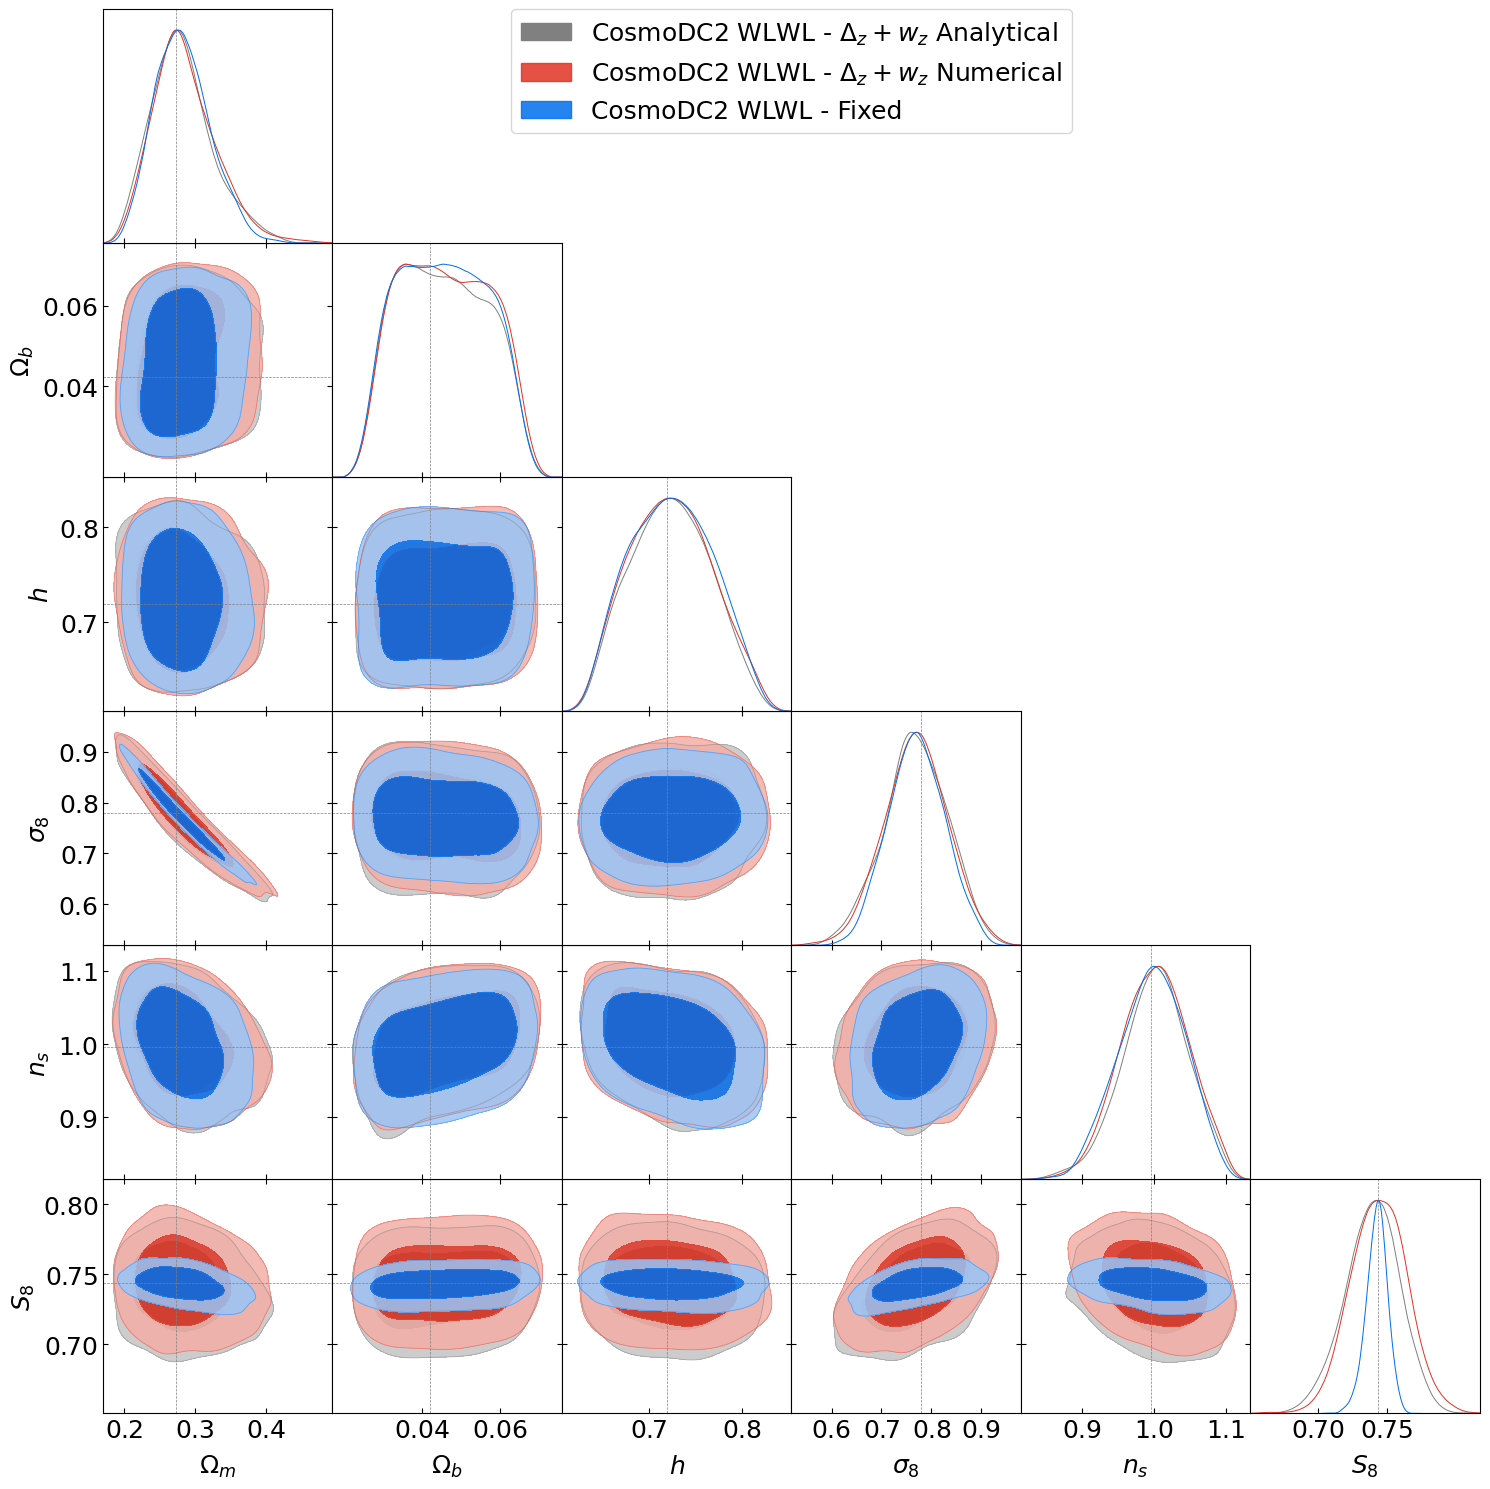

In [18]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([samples_wlwl_dz_ana,
                 samples_wlwl_dz_num,
                 samples_wlwl_nomarg],
                 #samples_3x2_nomarg],
                 #['Ωm', 'σ8', 'S8'],
                 markers=prat_markers,
                 filled=True)

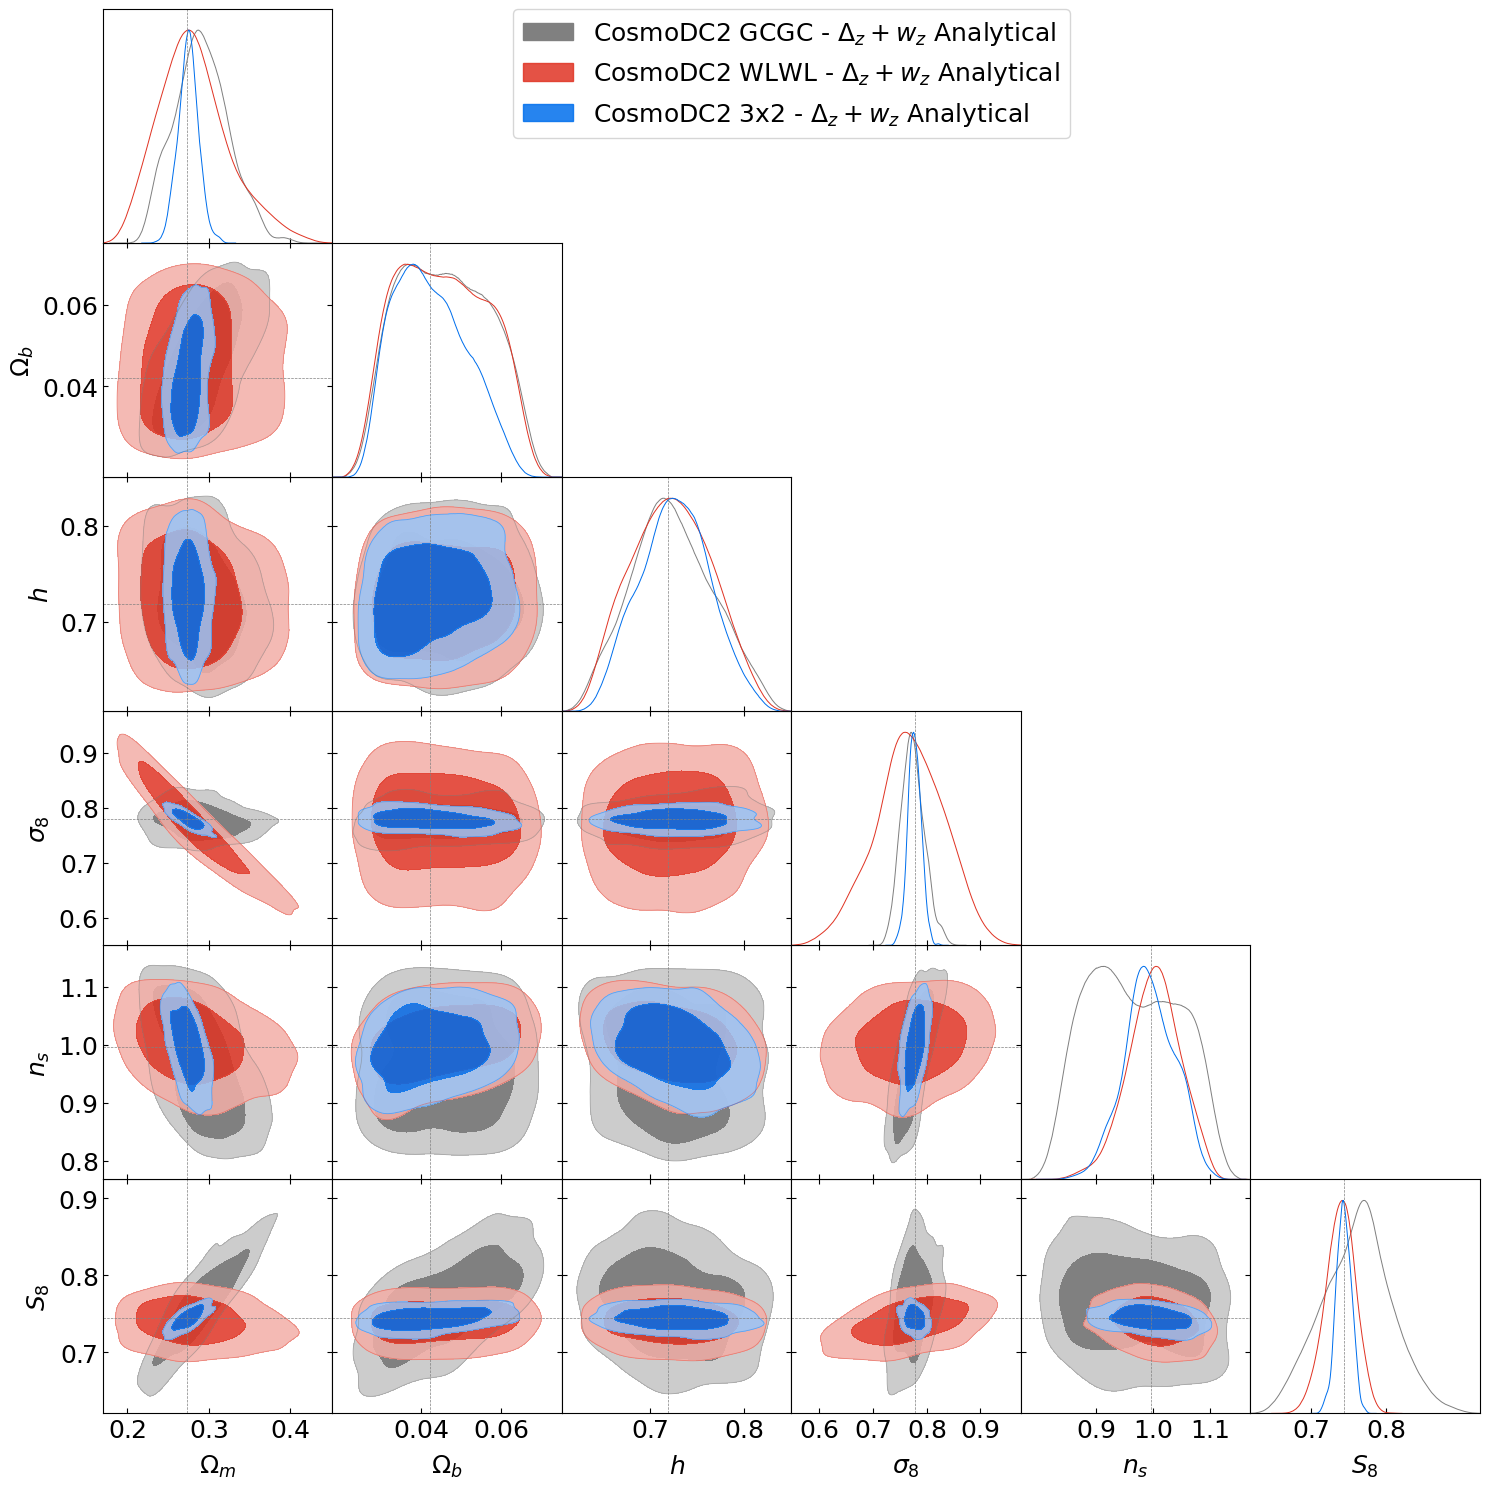

In [19]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([samples_gcgc_dz_ana,
                 samples_wlwl_dz_ana,
                 samples_3x2_dz_ana,],
                 markers=prat_markers,
                 filled=True)

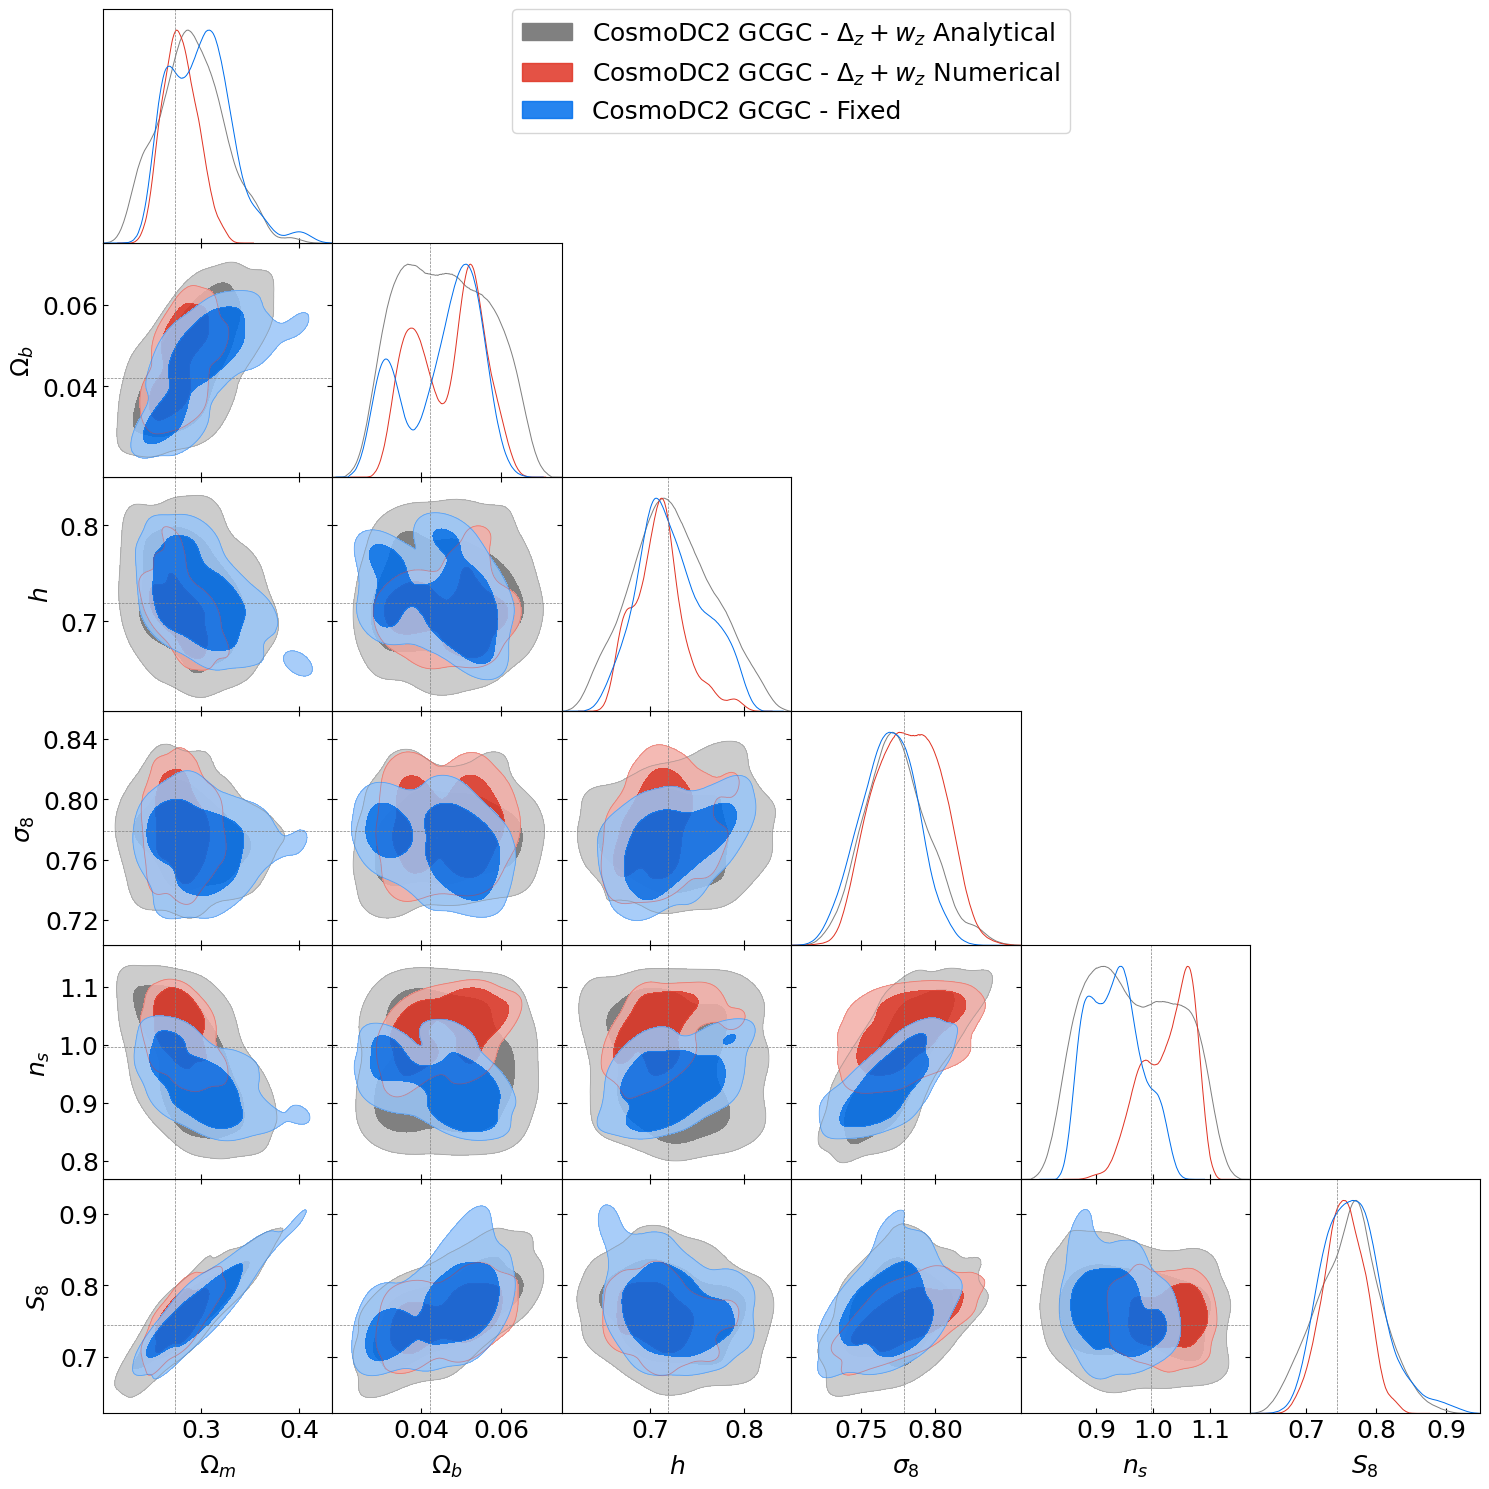

In [20]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([samples_gcgc_dz_ana,
                 samples_gcgc_dz_num,
                 samples_gcgc_nomarg],
                 markers=prat_markers,
                 filled=True)

## Likelihood

In [21]:
theories = np.load("data/CosmoDC2/theories.npz")
data_wlwl = theories["t_wlwl"]
data_gcgc = theories["t_gcgc"]
data_3x2 = theories["t_3x2"]

In [22]:
k = 0
data_wlwl_segs = []
for cls in cle_wlwl.data:
    i = len(cls)
    data_wlwl_segs.append(data_wlwl[k:k+i])
    k = k+i

k = 0
data_gcgc_segs = []
for cls in cle_gcgc.data:
    i = len(cls)
    data_gcgc_segs.append(data_gcgc[k:k+i])
    k = k+i

k = 0
data_3x2_segs = []
for cls in cle_3x2.data:
    i = len(cls)
    data_3x2_segs.append(data_3x2[k:k+i])
    k = k+i

In [23]:
cle_wlwl.data = data_wlwl_segs
cle_gcgc.data = data_gcgc_segs
cle_3x2.data  = data_3x2_segs

In [24]:
lkl_wlwl_nomarg  = np.transpose(np.transpose(np.array(chain_wlwl_nomarg))[8:233])
lkl_gcgc_nomarg  = np.transpose(np.transpose(np.array(chain_gcgc_nomarg))[8:149])
lkl_3x2_nomarg   = np.transpose(np.transpose(np.array(chain_3x2_nomarg))[8:618])
#lkl_3x2_nomarg2  = np.transpose(np.transpose(np.array(chain_3x2_nomarg2))[8:618])
#lkl_3x2_nomarg3  = np.transpose(np.transpose(np.array(chain_3x2_nomarg3))[8:618])

In [25]:
xi2_wlwl_nomarg = np.array(chain_wlwl_nomarg['lp'])
xi2_gcgc_nomarg = np.array(chain_gcgc_nomarg['lp'])
xi2_3x2_nomarg  = np.array(chain_3x2_nomarg['lp'])
#xi2_3x2_nomarg2 = np.array(chain_3x2_nomarg2['lp'])
#xi2_3x2_nomarg3 = np.array(chain_3x2_nomarg3['lp'])

In [26]:
lkl_wlwl_nomarg_m, lkl_wlwl_nomarg_s = np.mean(lkl_wlwl_nomarg, axis=1), np.std(lkl_wlwl_nomarg, axis=1)
lkl_gcgc_nomarg_m, lkl_gcgc_nomarg_s = np.mean(lkl_gcgc_nomarg, axis=1), np.std(lkl_gcgc_nomarg, axis=1)
lkl_3x2_nomarg_m, lkl_3x2_nomarg_s   = np.mean(lkl_3x2_nomarg, axis=1), np.std(lkl_3x2_nomarg, axis=1)

In [27]:
lkl_wlwl_nomarg_cles = [pacc.ClTheoryEnsemble(cle_wlwl, np.array(lkl_wlwl_nomarg[i])) for i in range(len(lkl_wlwl_nomarg))] 
lkl_gcgc_nomarg_cles = [pacc.ClTheoryEnsemble(cle_gcgc, np.array(lkl_gcgc_nomarg[i])) for i in range(len(lkl_gcgc_nomarg))]
lkl_3x2_nomarg_cles  = [pacc.ClTheoryEnsemble(cle_3x2,  np.array(lkl_3x2_nomarg[i]))  for i in range(len(lkl_3x2_nomarg))]
#lkl_3x2_nomarg2_cles = [pacc.ClTheoryEnsemble(cle_3x2, np.array(lkl_3x2_nomarg2[i])) for i in range(len(lkl_3x2_nomarg2))]
#lkl_3x2_nomarg3_cles = [pacc.ClTheoryEnsemble(cle_3x2, np.array(lkl_3x2_nomarg3[i])) for i in range(len(lkl_3x2_nomarg3))]

In [28]:
sel_wlwl = np.random.choice(len(lkl_wlwl_nomarg), 100)
sel_gcgc = np.random.choice(len(lkl_gcgc_nomarg), 100)
sel_3x2  = np.random.choice(len(lkl_3x2_nomarg), 100)

In [29]:
lkl_wlwl_nomarg_cles = np.array(lkl_wlwl_nomarg_cles)[sel_wlwl]
lkl_gcgc_nomarg_cles = np.array(lkl_gcgc_nomarg_cles)[sel_gcgc]

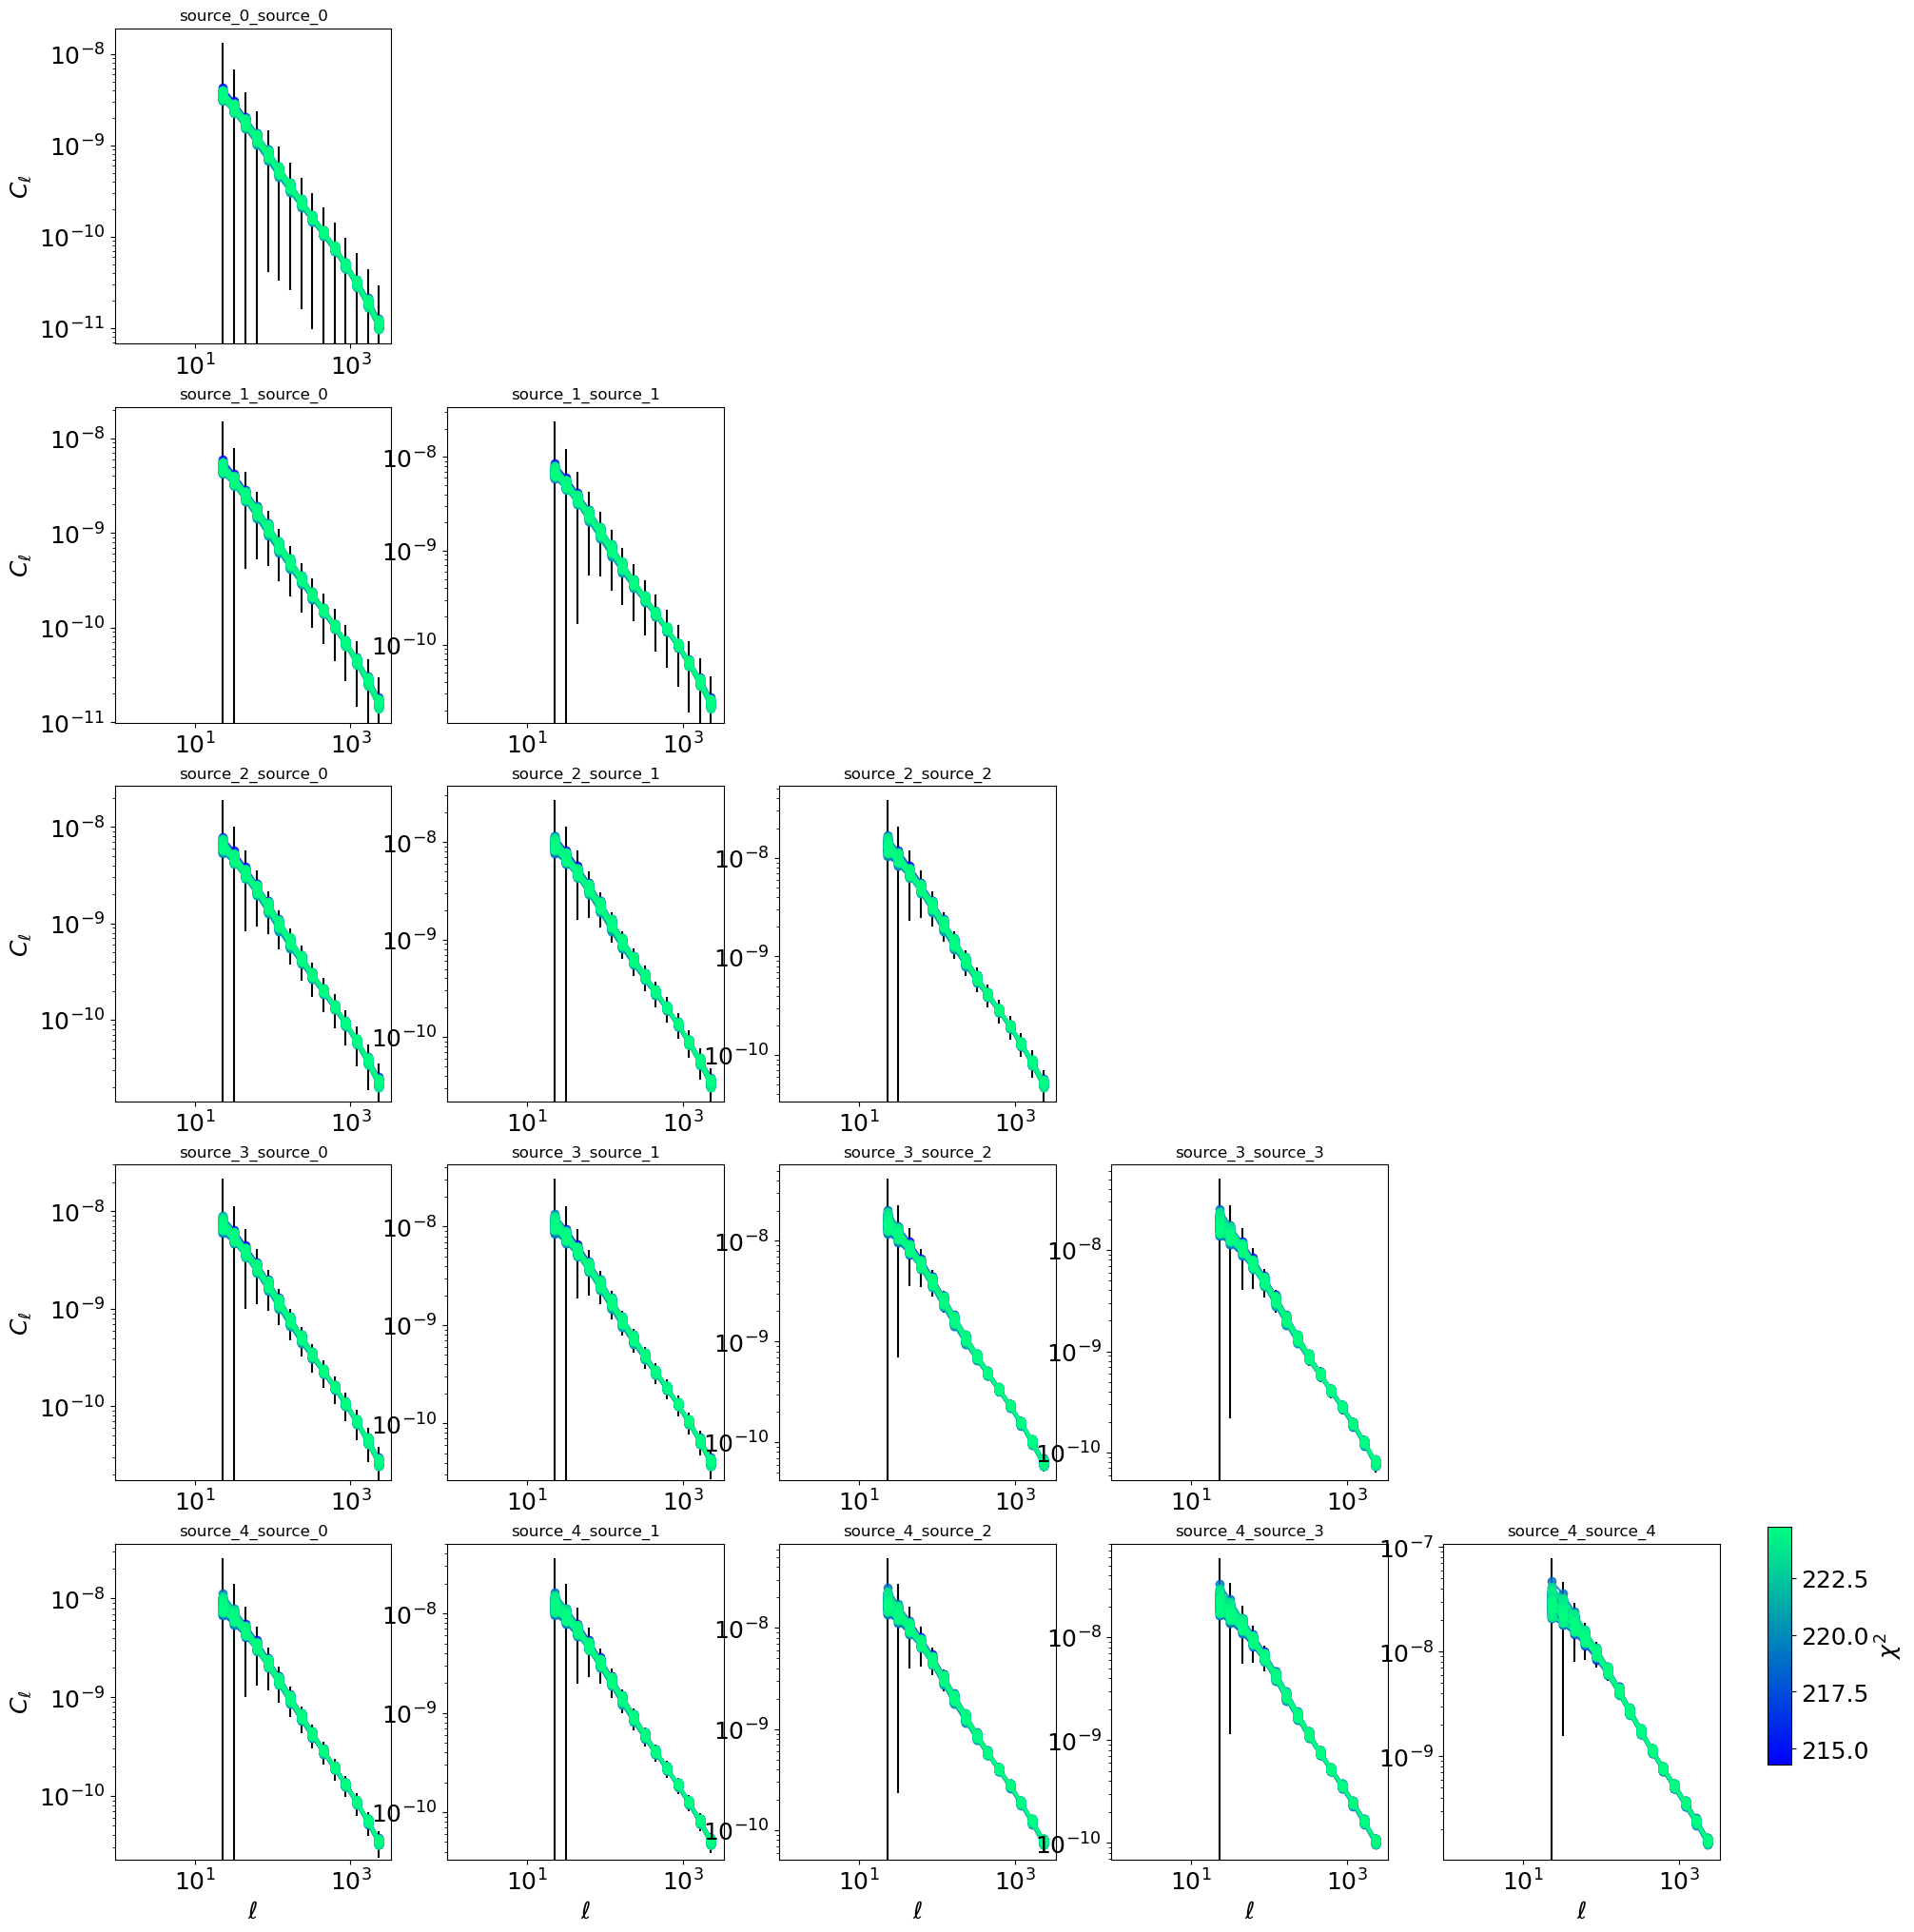

In [30]:
pacc.plot_cls([[cle_wlwl], lkl_wlwl_nomarg_cles], cle_wlwl.pairs,
              configs=[
                  {"colors":['black'], "show_legend":False},
                  {"alpha":0.8, "Xi2s":-xi2_wlwl_nomarg[sel_wlwl],
                "show_legend":False, "show_colobar":True}])

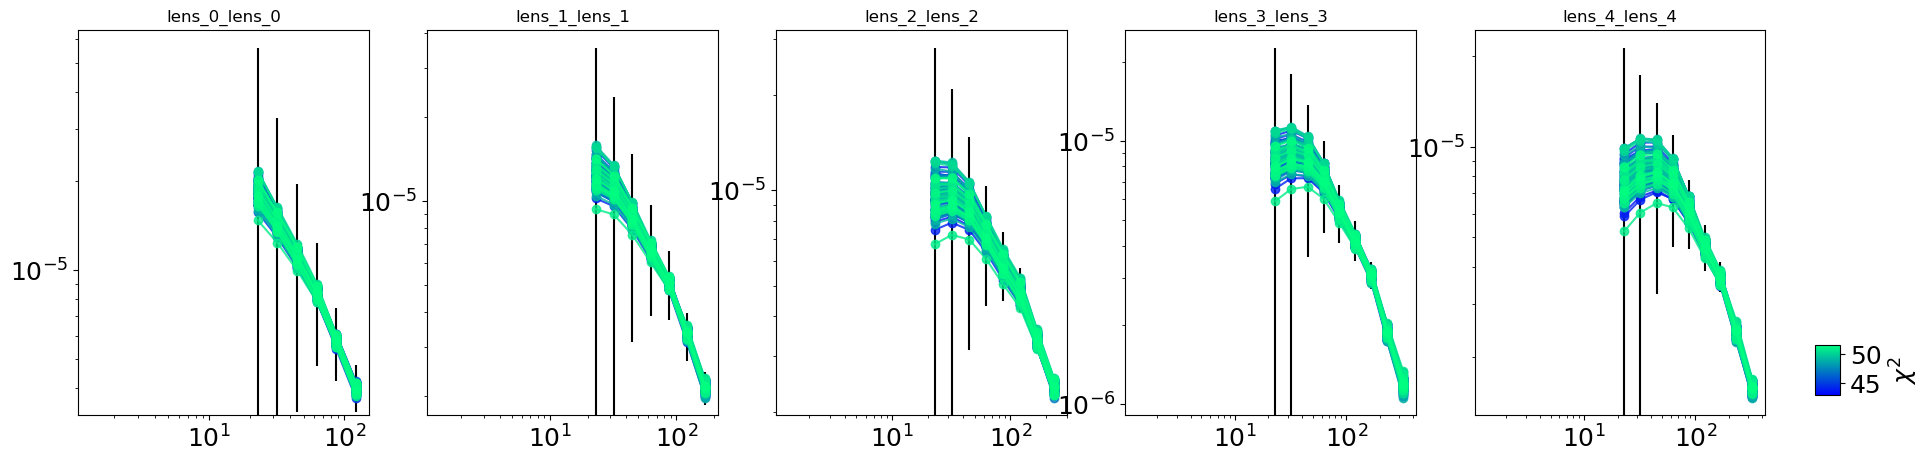

In [31]:
pacc.plot_cls([[cle_gcgc], lkl_gcgc_nomarg_cles], cle_gcgc.pairs,
                configs=[
                    {"colors":['black'], "show_legend":False},
                    {"alpha":0.8, "Xi2s":-xi2_gcgc_nomarg[sel_gcgc],
                    "show_legend":False, "show_colobar":True}])


In [32]:
#pacc.plot_cls([[cle_3x2], lkl_3x2_nomarg_cles], cle_3x2.pairs,
#                configs=[
#                    {"colors":['black'], "show_legend":False},
#                    {"alpha":0.8, "Xi2s":-xi2_3x2_nomarg[sel_3x2],
#                    "show_legend":False, "show_colobar":True}])